## THE Spark Foundation -GRIP - Data Science and Business Analytics - August ' 2021 

### **Simple Linear Regression** 
It is a Supervised Machine Learning Regression Algorithm involving 2 variables - one Independent variable and another Dependent variable. 

### TASK 1 :  Prediction using Supervised ML 

### Author : Utkarsh Upadhyay 

#### Dataset Link : The Dataset can be downloaded through following link :  http://bit.ly/w-data

##### Task : Predict the percentage of an student based on the no. of study hours. 

In [1]:
# importing libraries
import warnings
warnings.filterwarnings("ignore") 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# importing datasets 
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print(" Data imported successfully ")

 Data imported successfully 


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#####  Thus no null values present in our data 

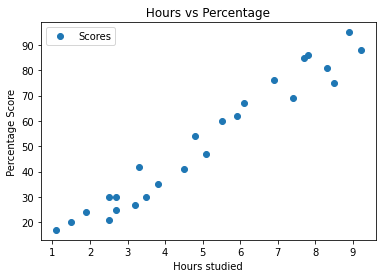

In [7]:
# Plotting the distribution of scores 
data.plot(x ='Hours',y ='Scores', style = 'o')
plt.title(" Hours vs Percentage ")
plt.xlabel(" Hours studied ")
plt.ylabel(" Percentage Score ")
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the Hours studied and Percentage score.**

In [8]:
# correlation will help us to find the relationship between attributes
# By default it will use Pearson method

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


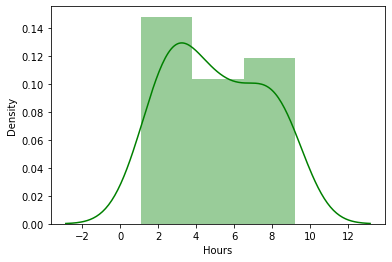

In [9]:
sns.distplot(data['Hours'] , color = 'green');

<AxesSubplot:xlabel='Scores', ylabel='Density'>

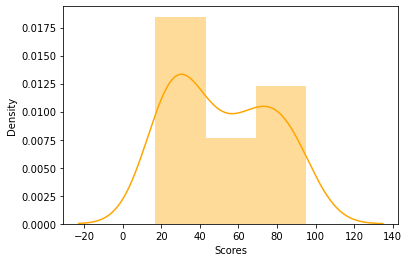

In [10]:
sns.distplot(data['Scores'] , color = 'orange')

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
# Splitting the data into independent and dependent variables 
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

#### Now that we have our X and Y labels -> now we need to split our data into Train and Test Data . We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
# Splitting the data into Train and Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

##### 80 % of data will be Train data and 20% of data will be test data 

### Training the Algorithm

In [13]:
# Training the Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression()

In [14]:
algo  = LinearRegression()

In [15]:
algo.fit(X_train,Y_train)

LinearRegression()

In [16]:
# Predicting the Results 
Y_pred = regressor.predict(X_test)

In [17]:
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

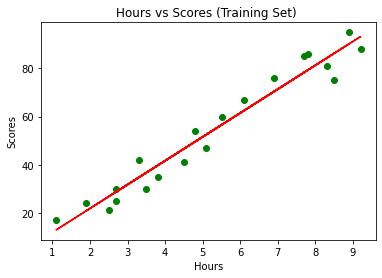

In [18]:
# Visualizing the Training set result 
plt.scatter(X_train , Y_train , color = 'green')
plt.plot(X_train , regressor.predict(X_train) , color='red')
plt.title("Hours vs Scores (Training Set) ")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

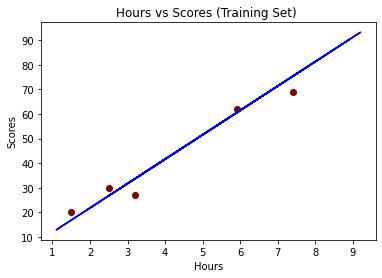

In [19]:
# Visualizing the Test set result 
plt.scatter(X_test , Y_test , color = 'maroon')
plt.plot(X_train , regressor.predict(X_train) , color='blue')
plt.title("Hours vs Scores (Training Set) ")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

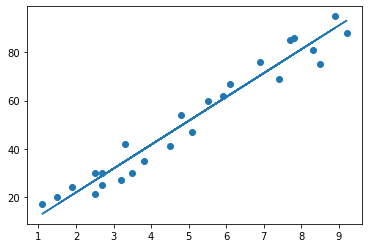

In [20]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_   # y=mx+c

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making Predictions 

In [21]:
pred = algo.predict(X_test)
data1 = pd.DataFrame({"Actual Value" : Y_test , "Predicted Value" : pred})
data1

,Actual Value,Predicted Value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [22]:
# Predicting the Result
pred1 = algo.predict([[9.0]])
pred1

array([91.21406837])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

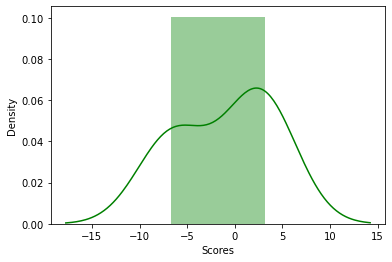

In [23]:
sns.distplot(Y_test-pred , color = 'Green')

#### Testing with our own data 

In [24]:
hours = 9.28
own_prediction = algo.predict([[hours]])
print("No. of Hours: {} ".format(hours))
print("Predicted Scores: {} ".format(own_prediction))

No. of Hours: 9.28 
Predicted Scores: [93.98905218] 


#####  Thus model is predicting that if student studies for 9.28 hours per day he/she is likely to score 93.98905218%

### Evaluating the model 

In [25]:
# Checking the R2 score and Mean Absolute Error 
from sklearn import metrics
print("Mean Absolute Error : " 
      ,metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error :  4.183859899002975


In [26]:
# Checking the Accuracy of the model 
from sklearn.metrics import r2_score
print("R2 Score : " , r2_score(Y_test , Y_pred))

R2 Score :  0.9454906892105356


#### Thus after Evaluating the model we calculated Mean Absolute Error as 4.18 and Accuracy of Model as 94.54%